# SafeCoder Dataset Inspection

This notebook inspects and counts samples across the SafeCoder dataset, including training, validation, and evaluation splits.

In [1]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 14.6 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.2 MB/s eta 0:00:0000:0100:01
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)


In [1]:
pwd

'/home/balu/projects/EffectiveSamplingWithSafeCoder'

In [4]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path

# Set up paths
base_dir = './'
data_train_val = os.path.join(base_dir, 'data_train_val')
data_eval = os.path.join(base_dir, 'data_eval')

print("SafeCoder Dataset Inspector")
print(f"Base directory: {base_dir}")
print(f"Training/Validation data: {data_train_val}")
print(f"Evaluation data: {data_eval}")

SafeCoder Dataset Inspector
Base directory: ./
Training/Validation data: ./data_train_val
Evaluation data: ./data_eval


## Load Dataset Files

In [5]:
def load_jsonl_files(directory):
    """Load all JSONL files from a directory"""
    data = {}
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return data
    
    for filename in os.listdir(directory):
        if filename.endswith('.jsonl'):
            filepath = os.path.join(directory, filename)
            records = []
            try:
                with open(filepath, 'r') as f:
                    for line in f:
                        if line.strip():
                            records.append(json.loads(line))
                data[filename] = records
                print(f"Loaded {filename}: {len(records)} samples")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return data

# Load training and validation data
train_val_data = load_jsonl_files(os.path.join(data_train_val, 'train'))
print("\n--- Training Data ---")
for dataset_name, records in train_val_data.items():
    print(f"{dataset_name}: {len(records)} samples")

val_data = load_jsonl_files(os.path.join(data_train_val, 'val'))
print("\n--- Validation Data ---")
for dataset_name, records in val_data.items():
    print(f"{dataset_name}: {len(records)} samples")

Loaded lmsys.jsonl: 16632 samples
Loaded sec-desc.jsonl: 720 samples
Loaded sec-new-desc.jsonl: 421 samples
Loaded evol.jsonl: 30087 samples

--- Training Data ---
lmsys.jsonl: 16632 samples
sec-desc.jsonl: 720 samples
sec-new-desc.jsonl: 421 samples
evol.jsonl: 30087 samples
Loaded lmsys.jsonl: 1849 samples
Loaded sec-desc.jsonl: 83 samples
Loaded sec-new-desc.jsonl: 44 samples
Loaded evol.jsonl: 3343 samples

--- Validation Data ---
lmsys.jsonl: 1849 samples
sec-desc.jsonl: 83 samples
sec-new-desc.jsonl: 44 samples
evol.jsonl: 3343 samples


In [ ]:
def display_jsonl_files_fields(directory):
    """Load and display all JSONL files' fields from a directory"""
    data = {}
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return data
    
    for filename in os.listdir(directory):
        if filename.endswith('.jsonl'):
            filepath = os.path.join(directory, filename)
            records = []
            try:
                with open(filepath, 'r') as f:
                    for line in f:
                        if line.strip():
                            records.append(json.loads(line))
                data[filename] = records
                print(f"Loaded {filename}: {len(records)} samples")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return data

In [ ]:
# 
eval_data = load_jsonl_files(data_eval)
print("\n--- Evaluation Data ---")
for dataset_name, records in eval_data.items():
    print(f"{dataset_name}: {len(records)} samples")


--- Evaluation Data ---


In [10]:
def combine_all_jsonl(directory, output_path):
    """Combine all JSONL data into a single file"""
    jsonl_files = {}
    
    if not os.path.exists(directory):
        print(f'Directory not found: {directory}')
        return jsonl_files
    
    all_records = []
    for filename in os.listdir(directory):
        print(f'Files: {filename}')
        if filename.endswith('.jsonl'):
            
            filepath = os.path.join(directory, filename)
            print(f'Filepath: {filepath}')
            records = []
            try:
                with open(filepath, 'r') as f:
                    for line in f:
                        if line.strip():
                            records.append(json.loads(line))
                all_records.extend(records)
                print(f"Loaded {filename}: {len(records)} samples")
            except Exception as e:
                print(f"Error loading {filename}: {e}")

           
    # Save to file
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, 'w') as f:
        for record in all_records:
            f.write(json.dumps(record) + '\n')
    
    print(f"\n✓ Successfully combined {len(all_records):,} total records")
    print(f"✓ Saved to: {output_path}")
    return len(all_records)

# Combine all data
modified_dataset_dir = "modified_datasets"
output_file_train = os.path.join(base_dir, modified_dataset_dir, 'combined_all_train_data.jsonl')
output_file_eval = os.path.join(base_dir, modified_dataset_dir, 'combined_all_eval_data.jsonl')
data_train_val_path = os.path.join(data_train_val, 'train')
data_eval_path = os.path.join(data_train_val, 'val')
total_combined_train = combine_all_jsonl(data_train_val_path, output_file_train)
total_combined_eval = combine_all_jsonl(data_eval_path, output_file_eval)


Files: lmsys.jsonl
Filepath: ./data_train_val/train/lmsys.jsonl
Loaded lmsys.jsonl: 16632 samples
Files: sec-desc.jsonl
Filepath: ./data_train_val/train/sec-desc.jsonl
Loaded sec-desc.jsonl: 720 samples
Files: sec-new-desc.jsonl
Filepath: ./data_train_val/train/sec-new-desc.jsonl
Loaded sec-new-desc.jsonl: 421 samples
Files: evol.jsonl
Filepath: ./data_train_val/train/evol.jsonl
Loaded evol.jsonl: 30087 samples

✓ Successfully combined 47,860 total records
✓ Saved to: ./modified_datasets/combined_all_train_data.jsonl
Files: lmsys.jsonl
Filepath: ./data_train_val/val/lmsys.jsonl
Loaded lmsys.jsonl: 1849 samples
Files: sec-desc.jsonl
Filepath: ./data_train_val/val/sec-desc.jsonl
Loaded sec-desc.jsonl: 83 samples
Files: sec-new-desc.jsonl
Filepath: ./data_train_val/val/sec-new-desc.jsonl
Loaded sec-new-desc.jsonl: 44 samples
Files: evol.jsonl
Filepath: ./data_train_val/val/evol.jsonl
Loaded evol.jsonl: 3343 samples

✓ Successfully combined 5,319 total records
✓ Saved to: ./modified_datase

In [11]:
print("=" * 50)
print("TOTAL SAMPLE COUNTS")
print("=" * 50)
print(f"Training samples:   {total_combined_train:,}")
print(f"Validation samples: {total_combined_eval:,}")
print(f"{'─' * 50}")
print(f"GRAND TOTAL:        {total_combined_train + total_combined_eval:,}")
print("=" * 50)

TOTAL SAMPLE COUNTS
Training samples:   47,860
Validation samples: 5,319
──────────────────────────────────────────────────
GRAND TOTAL:        53,179


print all the fields in each of the dataset

In [15]:
train_data_dir_path = os.path.join(data_train_val, 'train')
val_data_dir_path = os.path.join(data_train_val, 'val')

train_files = for file in os.listdir(train_data_dir_path): train_files.extend(file)

In [14]:
def get_all_fields(data_dict):
    """Extract all unique fields from records"""
    all_fields = set()
    field_types = defaultdict(set)
    field_samples = {}
    
    for records in data_dict.values():
        for record in records:
            for field, value in record.items():
                all_fields.add(field)
                field_types[field].add(type(value).__name__)
                if field not in field_samples:
                    field_samples[field] = value
    
    return sorted(list(all_fields)), field_types, field_samples

# Display fields from training data
print("\n" + "=" * 80)
print("TRAINING DATA - ALL FIELDS")
print("=" * 80)
train_fields, train_types, train_samples = get_all_fields(train_val_data)
for i, field in enumerate(train_fields, 1):
    types_str = ", ".join(train_types[field])
    sample = str(train_samples[field])
    if len(sample) > 100:
        sample = sample[:100] + "..."
    print(f"\n{i}. {field}")
    print(f"   Type(s): {types_str}")
    print(f"   Sample: {sample}")

# Display fields from validation data
print("\n" + "=" * 80)
print("VALIDATION DATA - ALL FIELDS")
print("=" * 80)
val_fields, val_types, val_samples = get_all_fields(val_data)
for i, field in enumerate(val_fields, 1):
    types_str = ", ".join(val_types[field])
    sample = str(val_samples[field])
    if len(sample) > 100:
        sample = sample[:100] + "..."
    print(f"\n{i}. {field}")
    print(f"   Type(s): {types_str}")
    print(f"   Sample: {sample}")


# Summary of fields across all datasets
print("\n" + "=" * 80)
print("FIELD COMPARISON ACROSS DATASETS")
print("=" * 80)
all_unique_fields = sorted(list(set(train_fields + val_fields)))
print(f"Total unique fields: {len(all_unique_fields)}\n")
for field in all_unique_fields:
    in_train = "✓" if field in train_fields else "✗"
    in_val = "✓" if field in val_fields else "✗"
   
    print(f"{field:25s} | Train: {in_train} | Val: {in_val} ")


TRAINING DATA - ALL FIELDS

1. char_changes
   Type(s): dict
   Sample: {'deleted': [{'char_start': 4, 'char_end': 5, 'chars': 'c'}, {'char_start': 16, 'char_end': 178, 'ch...

2. commit_link
   Type(s): str
   Sample: github.com/russ-lewis/ttt_-_python_cgi/commit/6096f43fd4b2d91211eec4614b7960c0816900da

3. commit_msg
   Type(s): str
   Sample: refactor: use crypto random values instead of math.random to create UUID

4. description
   Type(s): str
   Sample: In Python, write a function to construct a tic-tac-toe board from a database, tracking the next play...

5. file_name
   Type(s): str
   Sample: cgi/common.py

6. func_name
   Type(s): str
   Sample: build_board

7. func_src_after
   Type(s): str
   Sample: def build_board(conn, game,size):
    # we'll build the empty board, and then fill in with the move ...

8. func_src_before
   Type(s): str
   Sample: def build_board(conn, game,size):
    # we'll build the empty board, and then fill in with the move ...

9. input
   Type(s): 

In [ ]:
def count_samples(data_dict):
    """Count total samples across all datasets"""
    total = sum(len(records) for records in data_dict.values())
    return total

# Calculate totals
train_total = count_samples(train_val_data)
val_total = count_samples(val_data)
eval_total = count_samples(eval_data)
grand_total = train_total + val_total + eval_total

print("=" * 50)
print("TOTAL SAMPLE COUNTS")
print("=" * 50)
print(f"Training samples:   {train_total:,}")
print(f"Validation samples: {val_total:,}")
print(f"Evaluation samples: {eval_total:,}")
print(f"{'─' * 50}")
print(f"GRAND TOTAL:        {grand_total:,}")
print("=" * 50)

## Count Total Samples

In [7]:
def count_samples(data_dict):
    """Count total samples across all datasets"""
    total = sum(len(records) for records in data_dict.values())
    return total

# Calculate totals
train_total = count_samples(train_val_data)
val_total = count_samples(val_data)
eval_total = count_samples(eval_data)
grand_total = train_total + val_total + eval_total

print("=" * 50)
print("TOTAL SAMPLE COUNTS")
print("=" * 50)
print(f"Training samples:   {train_total:,}")
print(f"Validation samples: {val_total:,}")
print(f"Evaluation samples: {eval_total:,}")
print(f"{'─' * 50}")
print(f"GRAND TOTAL:        {grand_total:,}")
print("=" * 50)

TOTAL SAMPLE COUNTS
Training samples:   47,860
Validation samples: 5,319
Evaluation samples: 0
──────────────────────────────────────────────────
GRAND TOTAL:        53,179


## Print All Fields in Each Dataset

In [8]:
def analyze_by_cwe(data_dict):
    """Count samples by vulnerability type (CWE)"""
    cwe_counts = defaultdict(int)
    for records in data_dict.values():
        for record in records:
            if 'vul_type' in record:
                cwe_counts[record['vul_type']] += 1
    return dict(sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True))

# Analyze training data by CWE
print("\n" + "=" * 50)
print("TRAINING DATA - VULNERABILITY TYPE DISTRIBUTION")
print("=" * 50)
train_cwe = analyze_by_cwe(train_val_data)
for cwe, count in train_cwe.items():
    percentage = (count / train_total * 100) if train_total > 0 else 0
    print(f"{cwe:20s}: {count:6,} samples ({percentage:5.1f}%)")

# Analyze validation data by CWE
print("\n" + "=" * 50)
print("VALIDATION DATA - VULNERABILITY TYPE DISTRIBUTION")
print("=" * 50)
val_cwe = analyze_by_cwe(val_data)
for cwe, count in val_cwe.items():
    percentage = (count / val_total * 100) if val_total > 0 else 0
    print(f"{cwe:20s}: {count:6,} samples ({percentage:5.1f}%)")


TRAINING DATA - VULNERABILITY TYPE DISTRIBUTION
cwe-089             :    244 samples (  0.5%)
cwe-078             :    132 samples (  0.3%)
cwe-125             :    130 samples (  0.3%)
cwe-079             :    114 samples (  0.2%)
cwe-022             :     83 samples (  0.2%)
cwe-476             :     79 samples (  0.2%)
cwe-787             :     62 samples (  0.1%)
cwe-502             :     60 samples (  0.1%)
cwe-416             :     57 samples (  0.1%)
cwe-190             :     48 samples (  0.1%)
cwe-377             :     31 samples (  0.1%)
cwe-327             :     24 samples (  0.1%)
cwe-119             :     12 samples (  0.0%)
cwe-681             :     11 samples (  0.0%)
cwe-200             :      9 samples (  0.0%)
cwe-915             :      9 samples (  0.0%)
cwe-352             :      8 samples (  0.0%)
cwe-326             :      7 samples (  0.0%)
cwe-916             :      5 samples (  0.0%)
cwe-611             :      5 samples (  0.0%)
cwe-295             :      3 sa

## Analyze by Programming Language

In [9]:
def analyze_by_language(data_dict):
    """Count samples by programming language"""
    lang_counts = defaultdict(int)
    for records in data_dict.values():
        for record in records:
            if 'file_name' in record:
                # Extract language from file extension
                lang = record['file_name'].split('.')[-1] if '.' in record['file_name'] else 'unknown'
                lang_counts[lang] += 1
    return dict(sorted(lang_counts.items(), key=lambda x: x[1], reverse=True))

# Analyze training data by language
print("\n" + "=" * 50)
print("TRAINING DATA - LANGUAGE DISTRIBUTION")
print("=" * 50)
train_lang = analyze_by_language(train_val_data)
for lang, count in train_lang.items():
    percentage = (count / train_total * 100) if train_total > 0 else 0
    print(f"{lang:20s}: {count:6,} samples ({percentage:5.1f}%)")

# Analyze validation data by language
print("\n" + "=" * 50)
print("VALIDATION DATA - LANGUAGE DISTRIBUTION")
print("=" * 50)
val_lang = analyze_by_language(val_data)
for lang, count in val_lang.items():
    percentage = (count / val_total * 100) if val_total > 0 else 0
    print(f"{lang:20s}: {count:6,} samples ({percentage:5.1f}%)")


TRAINING DATA - LANGUAGE DISTRIBUTION
py                  :    474 samples (  1.0%)
c                   :    373 samples (  0.8%)
js                  :     94 samples (  0.2%)
rb                  :     75 samples (  0.2%)
go                  :     41 samples (  0.1%)
cpp                 :     31 samples (  0.1%)
java                :     23 samples (  0.0%)
cc                  :     22 samples (  0.0%)
jsx                 :      7 samples (  0.0%)
h                   :      1 samples (  0.0%)

VALIDATION DATA - LANGUAGE DISTRIBUTION
py                  :     52 samples (  1.0%)
c                   :     41 samples (  0.8%)
js                  :     12 samples (  0.2%)
rb                  :      7 samples (  0.1%)
go                  :      4 samples (  0.1%)
cc                  :      4 samples (  0.1%)
java                :      3 samples (  0.1%)
cpp                 :      3 samples (  0.1%)
C                   :      1 samples (  0.0%)


## Visualize Distribution

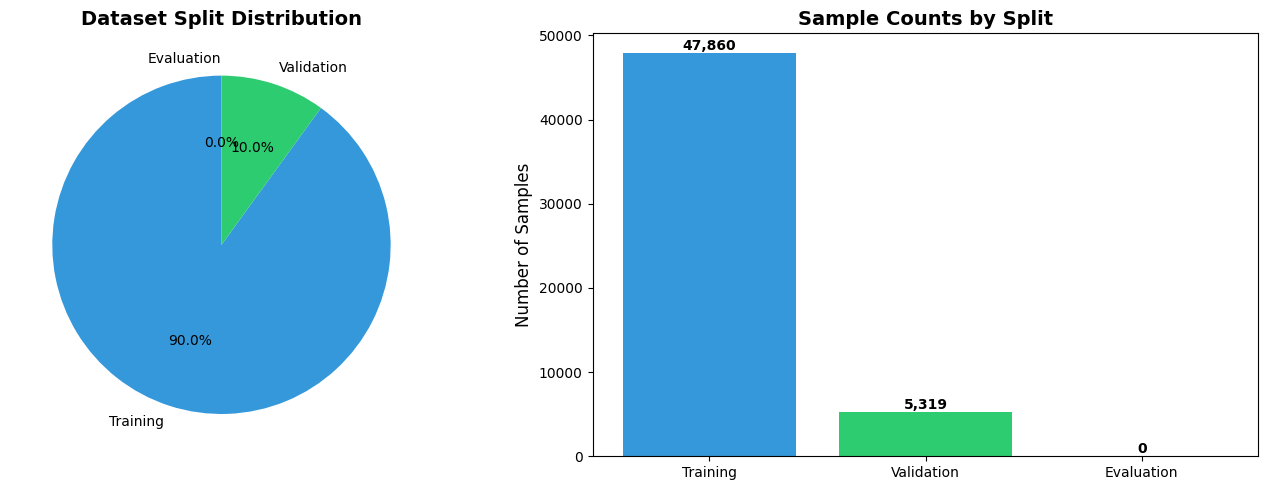

In [10]:
# Create visualization for dataset split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset split pie chart
split_data = [train_total, val_total, eval_total]
split_labels = ['Training', 'Validation', 'Evaluation']
colors = ['#3498db', '#2ecc71', '#e74c3c']

axes[0].pie(split_data, labels=split_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')

# Split bar chart
splits = ['Training', 'Validation', 'Evaluation']
counts = [train_total, val_total, eval_total]
axes[1].bar(splits, counts, color=colors)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_title('Sample Counts by Split', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='y')
for i, count in enumerate(counts):
    axes[1].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

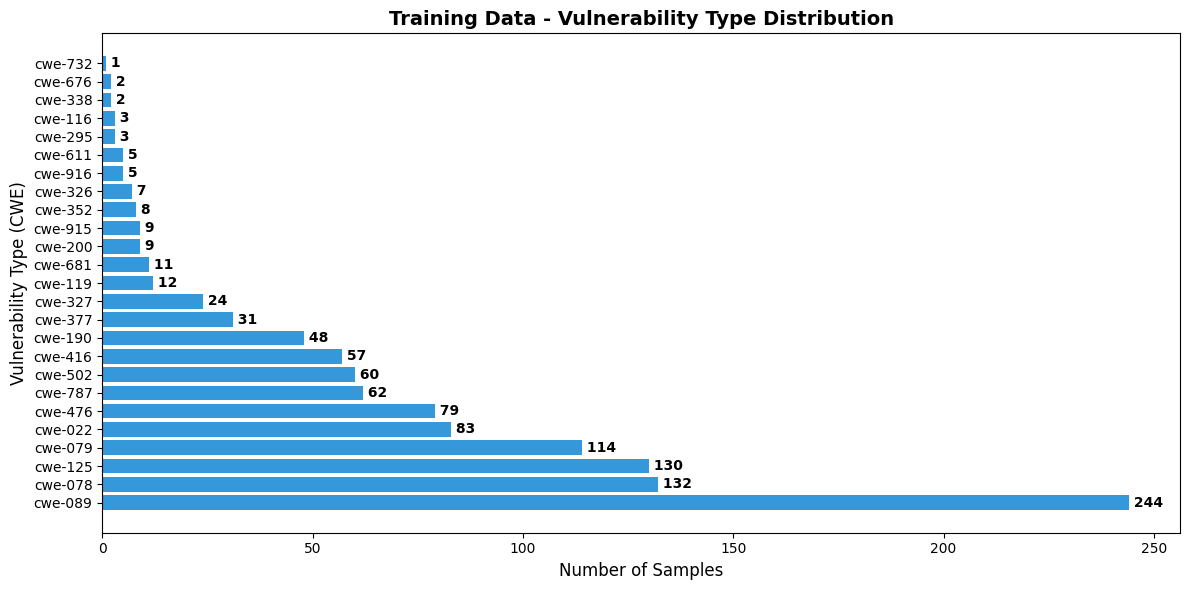

In [12]:
# Visualize vulnerability type distribution (Training)
if train_cwe:
    fig, ax = plt.subplots(figsize=(12, 6))
    cwes = list(train_cwe.keys())
    counts = list(train_cwe.values())
    
    ax.barh(cwes, counts, color='#3498db')
    ax.set_xlabel('Number of Samples', fontsize=12)
    ax.set_ylabel('Vulnerability Type (CWE)', fontsize=12)
    ax.set_title('Training Data - Vulnerability Type Distribution', fontsize=14, fontweight='bold')
    
    # Add count labels
    for i, count in enumerate(counts):
        ax.text(count, i, f' {count:,}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

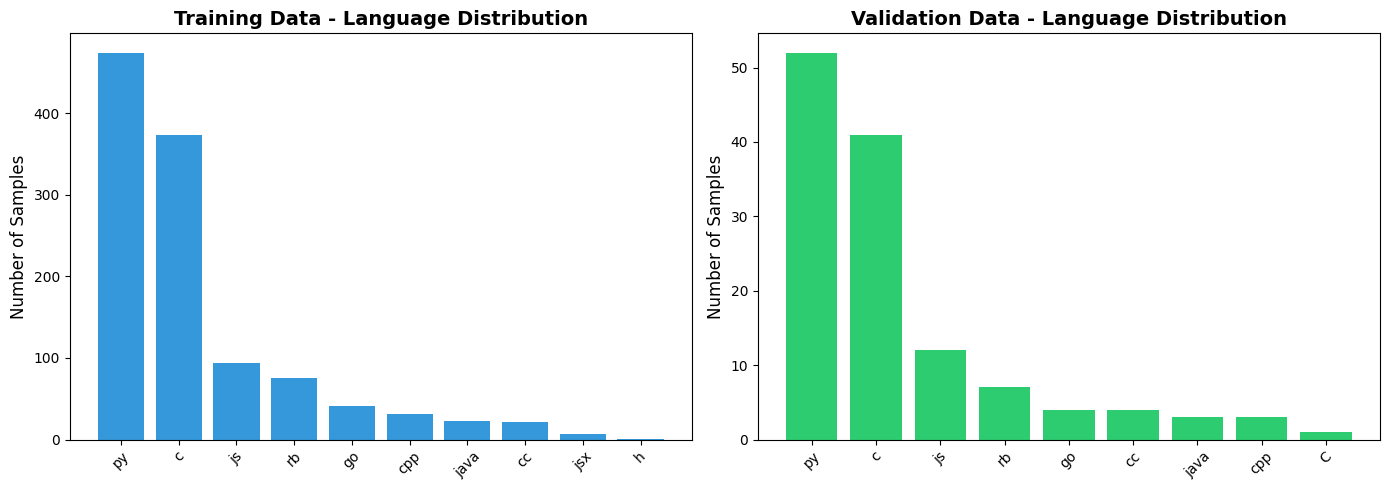

In [13]:
# Visualize language distribution
if train_lang:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Training language distribution
    train_langs = list(train_lang.keys())
    train_lang_counts = list(train_lang.values())
    axes[0].bar(train_langs, train_lang_counts, color='#3498db')
    axes[0].set_ylabel('Number of Samples', fontsize=12)
    axes[0].set_title('Training Data - Language Distribution', fontsize=14, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Validation language distribution
    if val_lang:
        val_langs = list(val_lang.keys())
        val_lang_counts = list(val_lang.values())
        axes[1].bar(val_langs, val_lang_counts, color='#2ecc71')
        axes[1].set_ylabel('Number of Samples', fontsize=12)
        axes[1].set_title('Validation Data - Language Distribution', fontsize=14, fontweight='bold')
        axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## Sample Records Summary

In [14]:
# Inspect structure of sample records
print("\n" + "=" * 50)
print("SAMPLE RECORD STRUCTURE")
print("=" * 50)

# Get first record from training data
for dataset_name, records in train_val_data.items():
    if records:
        sample = records[0]
        print(f"\nDataset: {dataset_name}")
        print(f"Keys in record: {list(sample.keys())}")
        print(f"\nSample record:")
        for key, value in sample.items():
            if isinstance(value, str) and len(str(value)) > 100:
                print(f"  {key}: {str(value)[:100]}...")
            else:
                print(f"  {key}: {value}")
        break


SAMPLE RECORD STRUCTURE

Dataset: sec-new-desc.jsonl
Keys in record: ['func_name', 'func_src_before', 'func_src_after', 'line_changes', 'char_changes', 'commit_link', 'file_name', 'vul_type', 'commit_msg', 'parent_commit', 'description']

Sample record:
  func_name: (anonymous)
  func_src_before: 				c => {
					// eslint-disable-next-line
					const r = (Math.random() * 16) | 0;
					// eslint-...
  func_src_after: 				symbol => {
					let array;

					if (symbol === "y") {
						array = ["8", "9", "a", "b"];
				...
  line_changes: {'deleted': [{'line_no': 1, 'char_start': 0, 'char_end': 11, 'line': '\t\t\t\tc => {\n'}], 'added': []}
  char_changes: {'deleted': [{'char_start': 4, 'char_end': 5, 'chars': 'c'}, {'char_start': 16, 'char_end': 178, 'chars': '// eslint-disable-next-line\n\t\t\t\t\tconst r = (Math.random() * 16) | 0;\n\t\t\t\t\t// eslint-disable-next-line\n\t\t\t\t\tconst v = c == "x" ? r : (r & 0x3) | 0x8;\n\t\t\t\t\treturn v'}], 'added': [{'char_start': 4, 'char_end': 1

## Summary Statistics

In [15]:
# Create summary DataFrame
summary_data = {
    'Dataset': ['Training', 'Validation', 'Evaluation', 'TOTAL'],
    'Sample Count': [train_total, val_total, eval_total, grand_total],
    'Percentage': [
        f"{train_total / grand_total * 100:.1f}%" if grand_total > 0 else "0%",
        f"{val_total / grand_total * 100:.1f}%" if grand_total > 0 else "0%",
        f"{eval_total / grand_total * 100:.1f}%" if grand_total > 0 else "0%",
        "100.0%"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 50)
print("SUMMARY STATISTICS")
print("=" * 50)
print(summary_df.to_string(index=False))

# Summary by dataset type
print("\n" + "=" * 50)
print("TRAINING DATASETS")
print("=" * 50)
train_summary = pd.DataFrame({
    'Dataset': list(train_val_data.keys()),
    'Sample Count': [len(records) for records in train_val_data.values()]
})
train_summary = train_summary.sort_values('Sample Count', ascending=False)
print(train_summary.to_string(index=False))

print("\n" + "=" * 50)
print("VALIDATION DATASETS")
print("=" * 50)
if val_data:
    val_summary = pd.DataFrame({
        'Dataset': list(val_data.keys()),
        'Sample Count': [len(records) for records in val_data.values()]
    })
    val_summary = val_summary.sort_values('Sample Count', ascending=False)
    print(val_summary.to_string(index=False))
else:
    print("No validation datasets found.")


SUMMARY STATISTICS
   Dataset  Sample Count Percentage
  Training         47860      90.0%
Validation          5319      10.0%
Evaluation             0       0.0%
     TOTAL         53179     100.0%

TRAINING DATASETS
           Dataset  Sample Count
        evol.jsonl         30087
       lmsys.jsonl         16632
    sec-desc.jsonl           720
sec-new-desc.jsonl           421

VALIDATION DATASETS
           Dataset  Sample Count
        evol.jsonl          3343
       lmsys.jsonl          1849
    sec-desc.jsonl            83
sec-new-desc.jsonl            44


## Create Custom Dataset Distributions

This section demonstrates different strategies for creating dataset distributions based on various criteria.

In [16]:
from sklearn.model_selection import train_test_split

# Combine all data for distribution creation
all_train_records = []
for records in train_val_data.values():
    all_train_records.extend(records)

print(f"Total training records available: {len(all_train_records)}")

# Helper function to filter records
def filter_by_cwe(records, cwes):
    """Filter records by specific CWE types"""
    return [r for r in records if r.get('vul_type') in cwes]

def filter_by_language(records, languages):
    """Filter records by specific programming languages"""
    return [r for r in records if r.get('file_name', '').split('.')[-1] in languages]

def filter_by_size(records, max_samples):
    """Limit dataset to max samples"""
    return records[:max_samples]

# Example 1: Create a language-specific distribution
print("\n" + "=" * 60)
print("EXAMPLE 1: Language-Specific Distributions")
print("=" * 60)

c_records = filter_by_language(all_train_records, ['c'])
cpp_records = filter_by_language(all_train_records, ['cpp', 'cc', 'cxx'])
java_records = filter_by_language(all_train_records, ['java'])
python_records = filter_by_language(all_train_records, ['py'])

print(f"C records:      {len(c_records):,} samples")
print(f"C++ records:    {len(cpp_records):,} samples")
print(f"Java records:   {len(java_records):,} samples")
print(f"Python records: {len(python_records):,} samples")

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Example 2: Create a CWE-specific distribution
print("\n" + "=" * 60)
print("EXAMPLE 2: CWE-Specific Distributions")
print("=" * 60)

# Get unique CWEs
unique_cwes = set(r.get('vul_type') for r in all_train_records if 'vul_type' in r)
for cwe in sorted(unique_cwes)[:5]:  # Show first 5
    cwe_records = filter_by_cwe(all_train_records, [cwe])
    print(f"{cwe:20s}: {len(cwe_records):6,} samples")

In [ ]:
# Example 3: Create train/val/test splits with different ratios
print("\n" + "=" * 60)
print("EXAMPLE 3: Creating Train/Val/Test Splits")
print("=" * 60)

def create_train_val_test_split(records, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42):
    """Create stratified train/val/test splits"""
    # First split: train vs (val + test)
    train, temp = train_test_split(records, test_size=(1-train_ratio), random_state=random_state)
    
    # Second split: val vs test
    val_size = val_ratio / (val_ratio + test_ratio)
    val, test = train_test_split(temp, test_size=(1-val_size), random_state=random_state)
    
    return train, val, test

# Example splits
splits_configs = [
    (0.8, 0.1, 0.1, "Aggressive training (80/10/10)"),
    (0.7, 0.15, 0.15, "Balanced (70/15/15)"),
    (0.6, 0.2, 0.2, "Conservative (60/20/20)"),
]

for train_ratio, val_ratio, test_ratio, description in splits_configs:
    train, val, test = create_train_val_test_split(
        all_train_records[:1000],  # Use subset for demo
        train_ratio=train_ratio,
        val_ratio=val_ratio,
        test_ratio=test_ratio
    )
    print(f"\n{description}")
    print(f"  Train: {len(train):6,} samples ({len(train)/10:.1f}%)")
    print(f"  Val:   {len(val):6,} samples ({len(val)/10:.1f}%)")
    print(f"  Test:  {len(test):6,} samples ({len(test)/10:.1f}%)")

In [ ]:
# Example 4: Create balanced vs imbalanced distributions
print("\n" + "=" * 60)
print("EXAMPLE 4: Balanced vs Imbalanced Distributions")
print("=" * 60)

def create_balanced_dataset(records, target_size_per_class=None):
    """Create a balanced dataset by equal sampling from each class"""
    cwe_groups = defaultdict(list)
    for record in records:
        cwe = record.get('vul_type', 'unknown')
        cwe_groups[cwe].append(record)
    
    if target_size_per_class is None:
        # Use minimum class size
        target_size_per_class = min(len(v) for v in cwe_groups.values())
    
    balanced = []
    for cwe, group in cwe_groups.items():
        # Randomly sample target_size_per_class records
        if len(group) >= target_size_per_class:
            balanced.extend(np.random.choice(group, target_size_per_class, replace=False))
        else:
            balanced.extend(group)
    
    return balanced

def create_imbalanced_dataset(records):
    """Create an imbalanced dataset (keep original distribution)"""
    return records

balanced_data = create_balanced_dataset(all_train_records[:2000])
imbalanced_data = create_imbalanced_dataset(all_train_records[:2000])

print(f"\nBalanced dataset size: {len(balanced_data):,}")
print(f"Imbalanced dataset size: {len(imbalanced_data):,}")

# Show distribution
print("\nBalanced distribution by CWE:")
balanced_cwe = defaultdict(int)
for r in balanced_data:
    balanced_cwe[r.get('vul_type', 'unknown')] += 1
for cwe, count in sorted(balanced_cwe.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  {cwe:20s}: {count:6,} samples")

print("\nImbalanced distribution by CWE:")
imbalanced_cwe = defaultdict(int)
for r in imbalanced_data:
    imbalanced_cwe[r.get('vul_type', 'unknown')] += 1
for cwe, count in sorted(imbalanced_cwe.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  {cwe:20s}: {count:6,} samples")

In [ ]:
# Example 5: Create size-limited distributions (for quick experiments)
print("\n" + "=" * 60)
print("EXAMPLE 5: Size-Limited Distributions")
print("=" * 60)

size_configs = [
    (100, "Small (for rapid prototyping)"),
    (500, "Medium (for quick testing)"),
    (2000, "Large (for serious experiments)"),
    (10000, "Full (no limit)"),
]

for size, description in size_configs:
    limited = filter_by_size(all_train_records, size)
    print(f"{description:40s}: {len(limited):6,} samples")

# Create specific limited distribution
mini_dataset = filter_by_size(all_train_records, 500)
print(f"\nCreated mini dataset with {len(mini_dataset):,} samples")

In [ ]:
# Example 6: Save custom distributions to JSONL files
print("\n" + "=" * 60)
print("EXAMPLE 6: Save Custom Distributions to JSONL")
print("=" * 60)

def save_distribution(records, output_path, description=""):
    """Save a distribution to JSONL file"""
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, 'w') as f:
        for record in records:
            f.write(json.dumps(record) + '\n')
    print(f"Saved {len(records):,} samples to {output_path}")
    if description:
        print(f"  ({description})")
    return output_path

# Create output directory
custom_dist_dir = os.path.join(base_dir, 'custom_distributions')
os.makedirs(custom_dist_dir, exist_ok=True)

# Example: Save C-language only distribution
c_dataset = filter_by_language(all_train_records, ['c'])
if c_dataset:
    c_lang_split = create_train_val_test_split(c_dataset, 0.7, 0.15, 0.15)
    save_distribution(c_lang_split[0], 
                     os.path.join(custom_dist_dir, 'c_language_train.jsonl'),
                     "C language samples for training")
    save_distribution(c_lang_split[1], 
                     os.path.join(custom_dist_dir, 'c_language_val.jsonl'),
                     "C language samples for validation")
    save_distribution(c_lang_split[2], 
                     os.path.join(custom_dist_dir, 'c_language_test.jsonl'),
                     "C language samples for testing")

## Distribution Strategies Summary

Here are the main strategies for creating custom dataset distributions:

In [ ]:
strategies = {
    "1. Language-Specific": {
        "Description": "Filter dataset by programming language (C, C++, Java, Python, etc.)",
        "Use Case": "Train models for specific languages",
        "Example": "c_records = filter_by_language(records, ['c'])"
    },
    "2. CWE-Specific": {
        "Description": "Filter dataset by vulnerability type (CWE)",
        "Use Case": "Train specialized models for specific vulnerability types",
        "Example": "cwe_records = filter_by_cwe(records, ['CWE-79'])"
    },
    "3. Train/Val/Test Split": {
        "Description": "Divide data into training, validation, and test sets with configurable ratios",
        "Use Case": "Standard ML workflow (70/15/15, 80/10/10, 60/20/20)",
        "Example": "train, val, test = create_train_val_test_split(records, 0.7, 0.15, 0.15)"
    },
    "4. Balanced Distribution": {
        "Description": "Ensure equal samples per class/vulnerability type",
        "Use Case": "Address class imbalance issues",
        "Example": "balanced = create_balanced_dataset(records, target_size_per_class=100)"
    },
    "5. Size-Limited": {
        "Description": "Create smaller datasets for quick experiments or prototyping",
        "Use Case": "Fast iteration and debugging",
        "Example": "mini = filter_by_size(records, 500)  # 500 samples"
    },
    "6. Stratified Sampling": {
        "Description": "Sample maintaining the original class distribution",
        "Use Case": "Preserve dataset characteristics in smaller subsets",
        "Example": "Uses train_test_split with stratify parameter"
    },
    "7. Composite Filtering": {
        "Description": "Combine multiple filters (language + CWE + size)",
        "Use Case": "Create highly specific datasets",
        "Example": "c_records = filter_by_language(records, ['c']); cwe_c = filter_by_cwe(c_records, ['CWE-79'])"
    },
    "8. Export to Files": {
        "Description": "Save distributions as JSONL files for training pipelines",
        "Use Case": "Create reproducible datasets for experiments",
        "Example": "save_distribution(records, 'output.jsonl')"
    }
}

print("\n" + "=" * 80)
print("DATASET DISTRIBUTION STRATEGIES")
print("=" * 80)

for strategy_name, details in strategies.items():
    print(f"\n{strategy_name}")
    print(f"  Description: {details['Description']}")
    print(f"  Use Case:    {details['Use Case']}")
    print(f"  Example:     {details['Example']}")
    print()


## Quick Reference: Create Your Own Distribution

In [ ]:
print("\n" + "=" * 80)
print("QUICK TEMPLATE: CREATE YOUR CUSTOM DISTRIBUTION")
print("=" * 80)

template = """
# Step 1: Start with all training records
records = all_train_records  # or any other source

# Step 2: Apply filters (optional)
records = filter_by_language(records, ['c', 'cpp'])  # Only C/C++
records = filter_by_cwe(records, ['CWE-79', 'CWE-89'])  # Only specific CWEs
records = filter_by_size(records, 5000)  # Limit to 5000 samples

# Step 3: Create splits or distributions
train, val, test = create_train_val_test_split(records, train_ratio=0.7)
# OR
balanced = create_balanced_dataset(records, target_size_per_class=500)

# Step 4: Save to file (optional)
save_distribution(train, '/path/to/custom_train.jsonl', 'My custom training set')
save_distribution(val, '/path/to/custom_val.jsonl', 'My custom validation set')

# Step 5: Use in your training pipeline!
"""

print(template)

# Practical example: Create a focused dataset
print("\n" + "=" * 80)
print("PRACTICAL EXAMPLE: Mixed Distribution")
print("=" * 80)

# Combine C/C++ languages
mixed = filter_by_language(all_train_records, ['c', 'cpp'])
print(f"1. Filtered to C/C++ languages: {len(mixed):,} samples")

# Further filter to specific CWEs
# unique_cwes_in_mixed = set(r.get('vul_type') for r in mixed)
# Show top CWEs
mixed_cwe = defaultdict(int)
for r in mixed:
    mixed_cwe[r.get('vul_type', 'unknown')] += 1
top_cwes = sorted(mixed_cwe.items(), key=lambda x: x[1], reverse=True)[:3]
top_cwe_types = [cwe for cwe, _ in top_cwes]
mixed = filter_by_cwe(mixed, top_cwe_types)
print(f"2. Filtered to top 3 CWEs: {len(mixed):,} samples")

# Create balanced distribution
mixed_balanced = create_balanced_dataset(mixed)
print(f"3. Balanced across CWEs: {len(mixed_balanced):,} samples")

# Create splits
mixed_train, mixed_val, mixed_test = create_train_val_test_split(mixed_balanced, 0.7, 0.15, 0.15)
print(f"4. Created train/val/test split:")
print(f"   - Train: {len(mixed_train):,} samples")
print(f"   - Val:   {len(mixed_val):,} samples")
print(f"   - Test:  {len(mixed_test):,} samples")
